<a href="https://colab.research.google.com/github/Nsi20/Sentiment-Analysis/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform Sentiment Analysis Using Python

Use Python and the Natural Language Toolkit (NLTK) to perform
sentiment analysis on customer reviews or social media data.

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Restaurant_Reviews.tsv to Restaurant_Reviews (1).tsv


# - Dataset of customer reviews

In [5]:
import pandas as pd

df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Installing Necessary Libraries

In [6]:
!pip install nltk


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# **Text Preprocessing**

In [8]:

def preprocess_text(text):

    text = text.lower()


    tokens = word_tokenize(text)


    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    return " ".join(filtered_tokens)


df['cleaned_review'] = df['Review'].apply(preprocess_text)


df[['Review', 'cleaned_review']].head()


,Review,cleaned_review
0,Wow... Loved this place.,wow loved place
1,Crust is not good.,crust good
2,Not tasty and the texture was just nasty.,tasty texture nasty
3,Stopped by during the late May bank holiday of...,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,selection menu great prices


# **Sentiment Analysis Using VADER**

In [9]:

sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    return sia.polarity_scores(text)

# Applying sentiment analysis
df['sentiment_scores'] = df['cleaned_review'].apply(get_sentiment)

# Extracting the compound score (overall sentiment) for each review
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Classifying sentiment as positive, negative, or neutral
df['sentiment'] = df['compound_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Check the results
df[['Review', 'cleaned_review', 'compound_score', 'sentiment']].head()


,Review,cleaned_review,compound_score,sentiment
0,Wow... Loved this place.,wow loved place,0.8271,positive
1,Crust is not good.,crust good,0.4404,positive
2,Not tasty and the texture was just nasty.,tasty texture nasty,-0.5574,negative
3,Stopped by during the late May bank holiday of...,stopped late may bank holiday rick steve recom...,0.6908,positive
4,The selection on the menu was great and so wer...,selection menu great prices,0.6249,positive


# **Visualizing the Results**

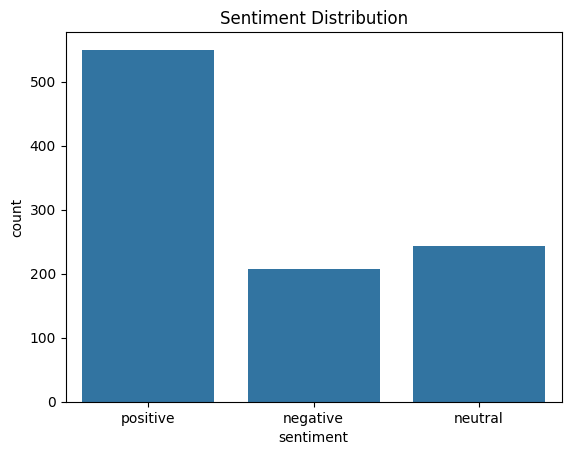

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()
